# SVM (수식을 포함하지 않고 설명)

출처 : https://hleecaster.com/ml-svm-concept/

## SVM이란

서포트 벡터 머신(이하 SVM)은 결정 경계(Decision Boundary), 즉 분류를 위한 기준 선을 정의하는 모델이다. 그래서 분류되지 않은 새로운 점이 나타나면 경계의 어느 쪽에 속하는지 확인해서 분류 과제를 수행할 수 있게 된다.

결국 이 결정 경계라는 걸 어떻게 정의하고 계산하는지 이해하는 게 중요하다는 뜻이다.

일단 예시를 보자.

만약 데이터에 2개 속성(feature)만 있다면 결정 경계는 이렇게 간단한 선 형태가 될 거다.



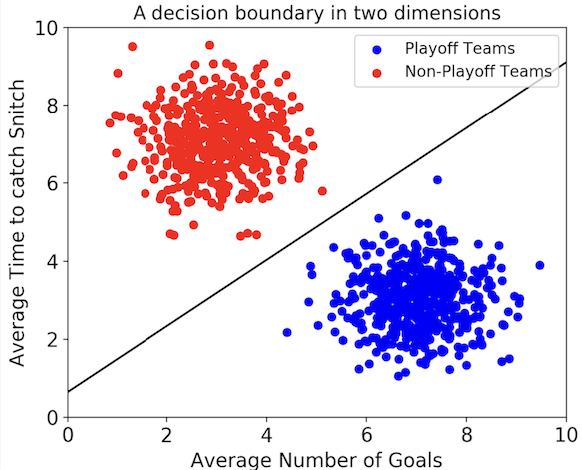

그러나 속성이 3개로 늘어난다면 이렇게 3차원으로 그려야 한다.



그리고 이 때의 결정 경계는 ‘선’이 아닌 ‘평면’이 된다.

우리가 이렇게 시각적으로 인지할 수 있는 범위는 딱 3차원까지다. 차원, 즉 속성의 개수가 늘어날수록 당연히 복잡해질 거다. 결정 경계도 단순한 평면이 아닌 고차원이 될 텐데 이를 “초평면(hyperplane)”이라고 부른다. (어렵게 생각할 필요는 없다. 일단 용어만 알고 넘어가자.)

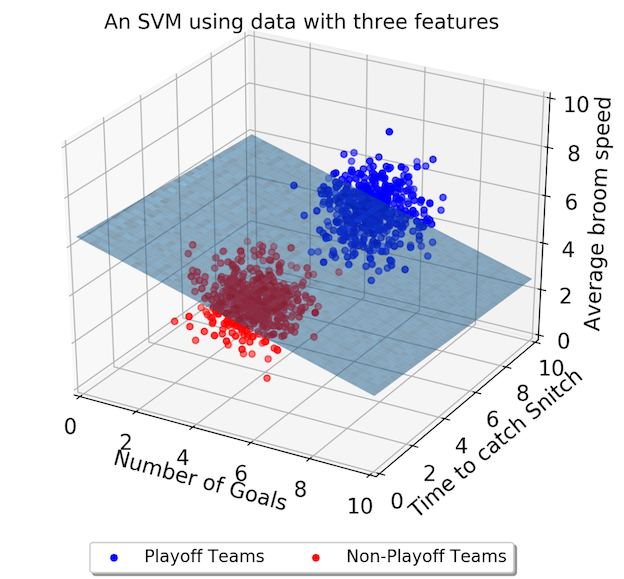

##최적의 결정 경계(Decision Boundary)

결정 경계는 무수히 많이 그을수 있을거다. 어떤 경계가 좋은 경계일까?

일단 아래 그림들을 보자

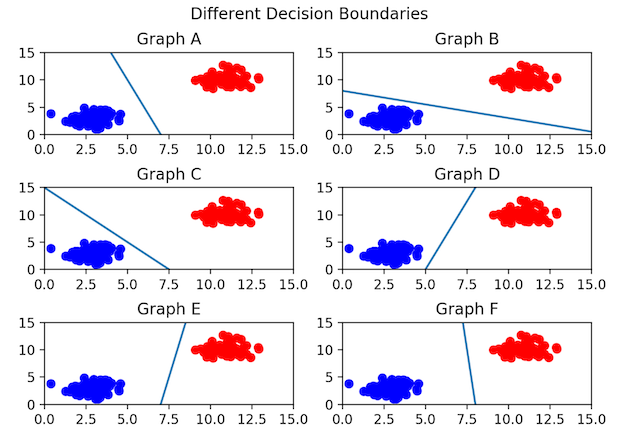

어떤 그래프가 제일 위태로워 보이는가?
C를 보면 선이 파란색 부류와 너무 가까워서 아슬아슬해보인다.

그렇다면 어떤 결정 경계가 가장 적절해보이는가?
당연히 F다. 두 클래스(분류) 사이에서 거리가 가장 멀기 때문이다.

이제 결정 경계는 데이터 군으로부터 최대한 멀리 떨어지는 게 좋다는 걸 알았다. 실제로 서포트 벡터 머신(Support Vector Machine)이라는 이름에서 Support Vectors는 결정 경계와 가까이 있는 데이터 포인트들을 의미한다. 이 데이터들이 경계를 정의하는 결정적인 역할을 하는 셈이다.

이어서 마진(Margin)이라는 용어에 대해 알아보자.



##마진(Margin)

마진(Margin)은 결정 경계와 서포트 벡터 사이의 거리를 의미한다.

아래 그림을 보면 바로 이해된다.

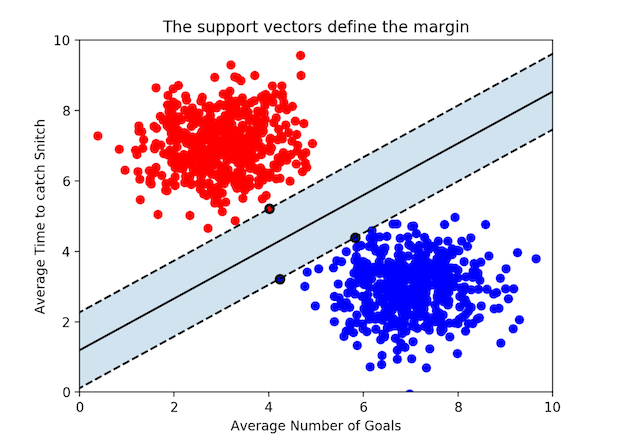

가운데 실선이 하나 그어져있는데, 이게 바로 ‘결정 경계’가 되겠다. 그리고 그 실선으로부터 검은 테두리가 있는 빨간점 1개, 파란점 2개까지 영역을 두고 점선을 그어놓았다. 점선으로부터 결정 경계까지의 거리가 바로 ‘마진(margin)’이다.

여기서 일단 결론을 하나 얻을 수 있다. 최적의 결정 경계는 마진을 최대화한다.

그리고 위 그림에서는 x축과 y축 2개의 속성을 가진 데이터로 결정 경계를 그었는데, 총 3개의 데이터 포인트(서포트 벡터)가 필요했다. 즉, n개의 속성을 가진 데이터에는 최소 n+1개의 서포트 벡터가 존재한다는 걸 알 수 있다.

이번엔 SVM 알고리즘의 장점을 하나 알 수 있다.

대부분의 머신러닝 지도 학습 알고리즘은 학습 데이터 모두를 사용하여 모델을 학습한다. 그런데 SVM에서는 결정 경계를 정의하는 게 결국 서포트 벡터이기 때문에 데이터 포인트 중에서 서포트 벡터만 잘 골라내면 나머지 쓸 데 없는 수많은 데이터 포인트들을 무시할 수 있다. 그래서 매우 빠르다.

## scikit-learn 사용법

SVM에서 결정 경계를 구하는 건 상당히 복잡한 최적화 문제다. 이 계산 과정을 온전히 이해하는 건 나 같은 무지랭이에겐 너무 버거운 일일 거다.

그러나 파이썬 scikit-learn 라이브러리가 있으니 일단 이걸 통해 SVM을 구현해보자. 게다가 scikit-learn을 활용하면 모델을 구현할 때 사용되는 추가적인 개념도 익힐 수 있다.

일단 아래 그림과 같이 선을 긋는 연습을 해보자.

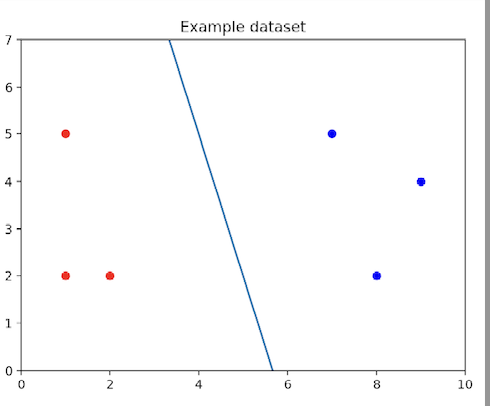

In [ ]:
from sklearn.svm import SVC

classifier = SVC(kernel = 'linear')

training_points = [[1, 2], [1, 5], [2, 2], [7, 5], [9, 4], [8, 2]]
labels = [1, 1, 1, 0, 0, 0]

classifier.fit(training_points, labels) 

SVC(kernel='linear')

일단 SVC를 불러올 때 kernel='linear'라고 지정해줬다. 이건 뒤에서 설명할 예정이니 일단 넘어가자

레이블은 빨간 걸 1, 파란걸 0으로 보면 된다.

그리고 .fit() 안에 학습 데이터와 레이블을 넣어주면 짠!하고 선을 긋는 거다. 이게 끝이다.

이제 .predict() 메서드를 통해 분류를 해볼 수 있다. 예를 들어 [3, 2]라는 데이터를 넣어 예측을 하려면 이렇게

In [ ]:
print(classifier.predict([[3, 2]]))
print(classifier.predict([[6, 6]]))


[1]
[0]


위 그림에서 직접 눈으로 [3, 2] 좌표를 찍어봐도 알 수 있듯 빨간 점, 1로 분류될 거다.

그리고 위에서 설명한 서포트 벡터, 결정 경계를 정의하는 서포트 벡터를 확인하려면 classifier.support_vectors_를 print 해보면 된다.

이렇게 나올 거다.



In [ ]:
print(classifier.support_vectors_)

[[7. 5.]
 [8. 2.]
 [2. 2.]]


파란 점 2개와 빨간 점 1개를 사용했다.



## 이상치(Outlier)를 얼마나 허용할 것인가

SVM은 ​​데이터 포인트들을 올바르게 분리하면서 마진의 크기를 최대화해야 하는데, 결국 이상치(outlier)를 잘 다루는 게 중요하다.

아래 그림을 보자. 선을 살펴보기에 앞서 왼쪽에 혼자 튀어 있는 파란 점과, 오른쪽에 혼자 튀어 있는 빨간 점이 있다는 걸 봐두자. 누가 봐도 아웃라이어다.

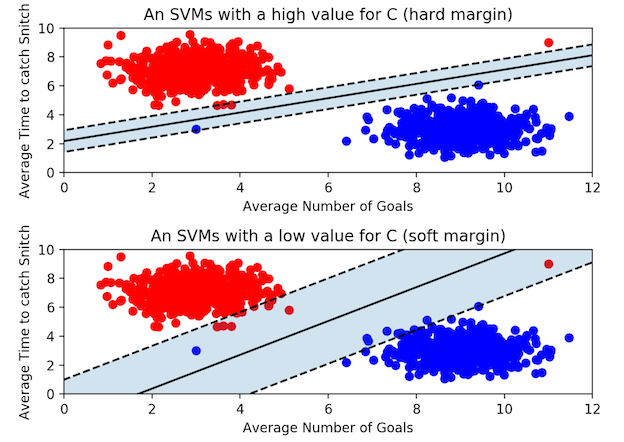

이제 위 아래 그림을 좀 더 자세히 비교해보자.

* 위의 그림은 아웃라이어를 허용하지 않고 기준을 까다롭게 세운 모양이다. 이걸 하드 마진(hard margin)이라고 부른다. 그리고 서포트 벡터와 결정 경계 사이의 거리가 매우 좁다. 즉, 마진이 매우 작아진다. 이렇게 개별적인 학습 데이터들을 다 놓치지 않으려고 아웃라이어를 허용하지 않는 기준으로 결정 경계를 정해버리면 오버피팅(overfitting) 문제가 발생할 수 있다.

* 아래 그림은 아웃라이어들이 마진 안에 어느정도 포함되도록 너그럽게 기준을 잡았다. 이걸 소프트 마진(soft margin)이라고 부른다. 이렇게 너그럽게 잡아 놓으니 서포트 벡터와 결정 경계 사이의 거리가 멀어졌다. 즉, 마진이 커진다. 대신 너무 대충대충 학습하는 꼴이라 언더피팅(underfitting) 문제가 발생할 수 있다.



## 파라미터 C


그리고 scikit-learn에서는 SVM 모델이 오류를 어느정도 허용할 것인지 파라미터 C를 통해 지정할 수 있다. (기본 값은 1이다.)



In [ ]:
classifier = SVC(C = 0.01)

C값이 클수록 하드마진(오류 허용 안 함), 작을수록 소프트마진(오류를 허용함)이다.

당연히 C의 최적 값은 데이터에 따라 다르다. 결국 여러가지 C값을 넣어보면서 모델을 검증하는 수밖에 없다.

##커널(Kernel)


지금까지는 선형으로 결정 경계를 그을 수 있는 형태의 데이터 세트를 예시로 들었다. 그런데 만약 SVM이 선형으로 분리 할 수 없는 데이터 세트가 있다면 어떻게 해야 할까?

극단적인 예를 들어… 이런 데이터가 있다고 해보자.



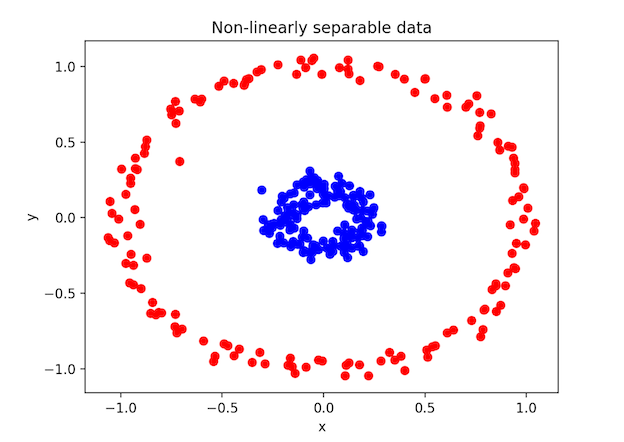

빨간색 점을 파란색 점과 분리하는 직선을 그릴 수가 없다

그러나 다행히도 scikit-learn에서는 SVM 모델을 만들 때 kernel을 지정하여 해결할 수 있다.

보통은 이렇게 선형('linear')으로 지정하지만



``` 
from sklearn.svm import SVC 
classifier = SVC(kernel = 'linear') 
```


'poly' 같은 걸 넣어줄 수도 있다. 이어서 좀 더 알아보겠다. 다만, 다른 커널을 사용할 때는 주의가 필요하다. 머신러닝 모델이 약간의 오차를 허용해야 하는 건 너무나 당연한 거라 단순히 outlier 때문에 선형으로 분리할 수 ​​없다고 판단해서는 안 된다. 일부 아웃라이어에 맞추기 위해 비선형으로 결정 경계를 만들 필요가 없다는 뜻이다. 모든 점을 올바르게 분리하는 선을 그린다는 건 결국 모델이 데이터에 과도하게 적합해진다는, 즉 오버피팅 된다는 거니까.

다른 커널들에 대해서도 좀 알아보자.

## 다항식(Ploynomial)

위에서 봤던 이 그림을 다시 보면




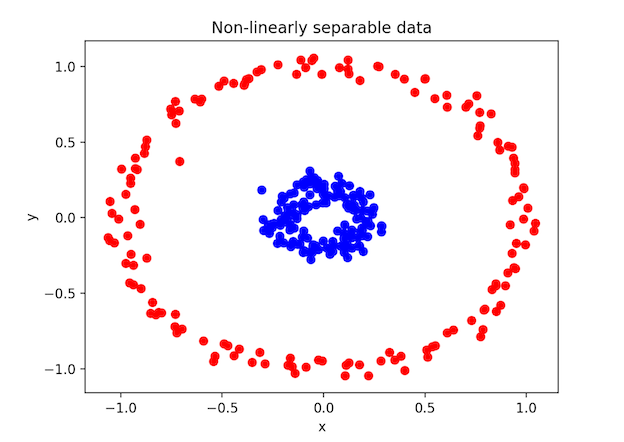

아무리 봐도 단순한 선형으로는 도저히 해결이 안 된다.

이때 다항식(polynomial) 커널을 사용하면 2차원에서 x, y 좌표로 이루어진 점들을 아래와 같은 식에 따라 3차원으로 표현하게 된다.

$(x, y) \rightarrow (\sqrt2 \cdot x \cdot y, x^2, y^2)$

예를 들어 [1, 2] 점이 있다고 하면 이렇게 3차원으로 계산해놓는다.

$(1, 2) \rightarrow (2\sqrt2, 1, 4)$

그리고 이렇게 다항식 커널로 계산한 데이터 포인트들을 3차원으로 그려보면 이런 모양이 나타난다.



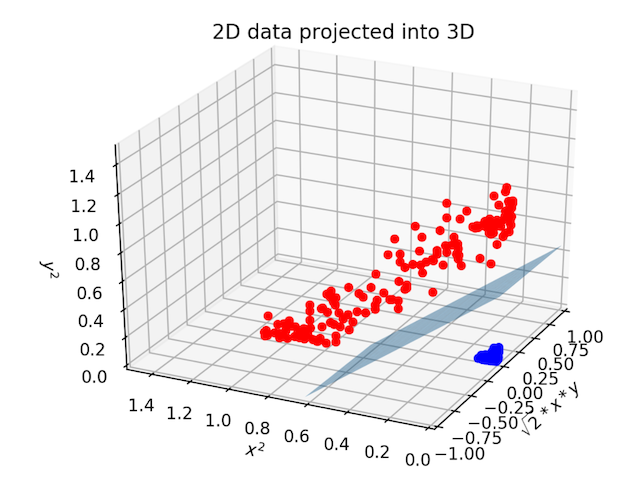

드디어 뭔가 결정 경계를 그어볼 수 있는 꼴로 바뀐 걸 알 수 있다.

이렇게 다항식(polynomial) 커널을 사용하면 데이터를 더 높은 차원으로 변형하여 나타냄으로써 초평면(hyperplane)의 결정 경계를 얻을 수 있다.



## 방사 기저 함수 (RBF: Radial Bias Function)


이건 이름이 좀 어려운데, 보통 RBF 커널 혹은 가우시안 커널이라고 부르기도 한다. (나도 RBF 커널이라는 표현을 써야겠다.)

sciklit-learn에서 모델을 불러올 때 파라미터로 kernel 값을 따로 안 넣어주었을 때의 기본값이 바로 이 'rbf'다. (위에서 언급했던 'linear', 'poly', 그리고 'sigmoid'와 같은 걸로 지정해줄 수도 있다.)


```
from sklearn.svm import SVC
classifier = SVC(kernel='rbf')

```



위에서 살펴본 'poly'(다항식) 커널은 2차원의 점을 3차원으로 변환했다.

그런데 이 RBF 커널은 2차원의 점을 무한한 차원의 점으로 변환한다…… 그래서 시각화하는 건 어렵고… 커널이 이 작업을 수행하는 방법에 대해서도 이해하기 어려우니 다루지 않을 거다. 상당히 복잡한 선형대수학이 사용된다는 것만 알고 넘어가자. 나도 잘 모른다.

그러나 하나 알고 가야 할 게 있다. 바로 감마(gamma)다.

## 파라미터 gamma


gamma는 (위에서 소개한 C와 마찬가지로) 파라미터다.





```
classifier = SVC(kernel = "rbf", C = 2, gamma = 0.5)
```


gamma는 결정 경계를 얼마나 유연하게 그을 것인지 정해주는 거다. 학습 데이터에 얼마나 민감하게 반응할 것인지 모델을 조정하는 거니까 C와 비슷한 개념이라 봐도 된다.

gamma값을 높이면 학습 데이터에 많이 의존해서 결정 경계를 구불구불 긋게 된다. 이는 오버피팅을 초래할 수 있다.
반대로 gamma를 낮추면 학습 데이터에 별로 의존하지 않고 결정 경계를 직선에 가깝게 긋게 된다. 이러면 언더피팅이 발생할 수 있다.
그림으로 보면 이해가 쉬우니 살펴보자.

일단 gamma가 적당하면 이런 모양이다.



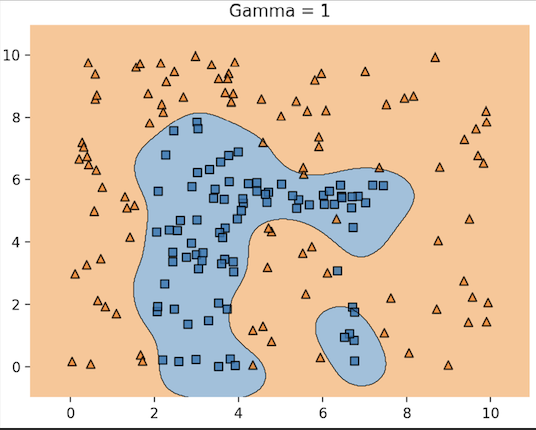

그러나 만약 gamma를 너무 높이면 이런 꼴이 되어 오버피팅이 발생한다.



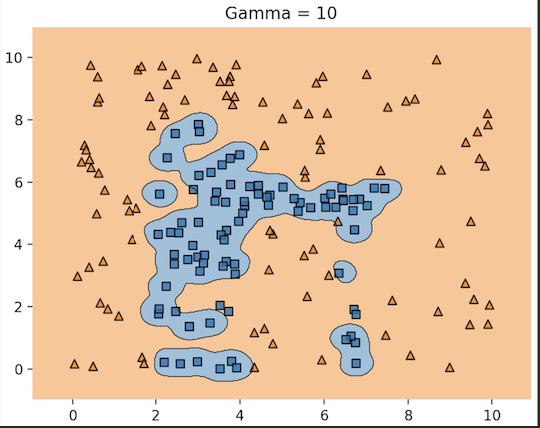

반대로 gamma를 너무 낮게 잡으면 이렇게 결정 경계를 너무 대충 그려서 언더피팅이 발생한다.



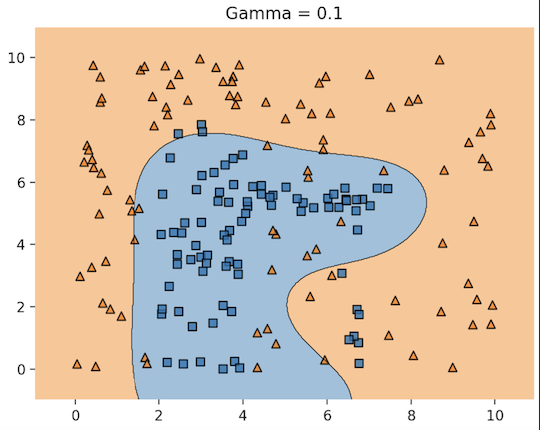

## 요약

여기까지 이해하면 SVM, 서포트 벡터 머신 알고리즘에 대해 어느정도의 감은 잡은 셈이다.

위에서 다룬 내용을 가볍게 요약하면 아래와 같다.

* SVM은 분류에 사용되는 지도학습 머신러닝 모델이다.
* SVM은 서포트 벡터(support vectors)를 사용해서 결정 경계(Decision Boundary)를 정의하고, 분류되지 않은 점을 해당 결정 경계와 비교해서 분류한다.
* 서포트 벡터(support vectors)는 결정 경계에 가장 가까운 각 클래스의 점들이다.
* 서포트 벡터와 결정 경계 사이의 거리를 마진(margin)이라고 한다.
* SVM은 허용 가능한 오류 범위 내에서 가능한 최대 마진을 만들려고 한다.
* 파라미터 C는 허용되는 오류 양을 조절한다. C 값이 클수록 오류를 덜 허용하며 이를 하드 마진(hard margin)이라 부른다. 반대로 C 값이 작을수록 오류를 더 많이 허용해서 소프트 마진(soft margin)을 만든다.
* SVM에서는 선형으로 분리할 수 없는 점들을 분류하기 위해 커널(kernel)을 사용한다.
* 커널(kernel)은 원래 가지고 있는 데이터를 더 높은 차원의 데이터로 변환한다. 2차원의 점으로 나타낼 수 있는 데이터를 다항식(polynomial) 커널은 3차원으로, RBF 커널은 점을 무한한 차원으로 변환한다.
* RBF 커널에는 파라미터 감마(gamma)가 있다. 감마가 너무 크면 학습 데이터에 너무 의존해서 오버피팅이 발생할 수 있다.


#SVM(Support Vector Machine)서포트 벡터 머신의 종류와 수식을 활용한 설명

출처 : https://zephyrus1111.tistory.com/211

서포트 벡터 머신(Support Vector Machine) 은 딥러닝이 나타나기전에 엄청 활성화 돼있었다고 한다

그 서포트 벡터 머신에 대한 개념과 종류 그리고 파이썬으로 구현하는 방법을 알아보자

1. 서포트 벡터 머신(Support Vector Machine)이란?
2. 서포트 벡터 머신(Support Vector Machine)종류
3. 서포트 벡터 머신(Support Vector Machine)장단점
4. Scikit - Learn을 이용한 서포트 벡터 머신 적용

## 1.서포트 벡터 머신(Support Vector Machine)이란?


서포트 벡터 머신(Support Vector Machine)은 여백(Margin)을 최대화하는 초평면(Hyperplane)을 찾는 지도 학습 알고리즘이다.

이 말의 의미를 하나하나 살펴보자.



###a. 여백(Margin)의 의미



서포트 벡터 머신(Support Vector Machine)을 이야기할 때에는 여백(Margin)이라는 단어가 항상 등장하게 된다. 여기서 말하는 여백(Margin)은 주어진 데이터가 오류를 발생시키지 않고 움직일 수 있 는 최대 공간이다.

여백의 개념은 서포트 벡터 머신(Support Vector Machine)을 분류 문제(classification)에 적용하느냐 아니면 회귀 문제(Regression)에 적용하느냐에 따라서 약간 다르다(개념은 똑같치만 분류 문제와 회귀 문제의 정의가 약간 다르다는 의미이다).



- 분류 문제에서의 여백(Margin)의 의미

먼저 분류 문제에서의 여백(Margin)의 의미를 알아보자. 아래 그림에서 입력 데이터가 2차원이고 라벨은 파란색과 빨간색 두 클래스가 있다고 해보자. 

이때 이를 분류하는 초평면을 초록색 직선이라고 하고 직선 윗부분을 파란 클래스, 아랫부분을 빨간 클래스로 예측한다고 해보자. 여기서 개별 데이터에 대하여 직선과의 거리를 생각할 수 있다. 이때 모든 데이터에 대해서 생각할 필요는 없고 직선과 가까운 부분(1번 파란 점)에서의 거리만을 고려한다. 파란색 1번 데이터가 직선과 수직인 방향으로 움직이고. 수직인 방향으로 점점 움직이다가 직선과의 거리를 초과한다면 직선 아랫부분에 놓이게 되고 이 직선은 해당 데이터를 파란색이 아닌 빨간색으로 예측하게 되어 오류가 발생할것이다.

따라서 파란색 1번 데이터와 직선과의 거리가 여백(Margin)이 되는 것이다(이를 넘어가면 오류를 발생 시키게된다)

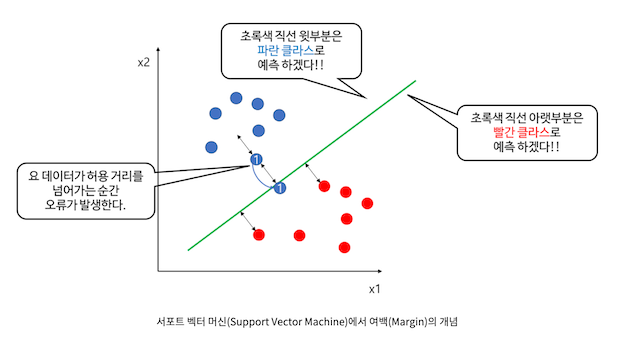

* 회귀 문제에서의 여백(Margin)의 의미

다음으로 회귀 문제에서의 여백(Margin)의 의미를 알아보자. 

여기서는 문제를 단순화하기 위하여 단순 선형 모형(설명 변수 1개)을 생각해보겠다. 

서포트 벡터 머신(Support Vector Machine)을 회귀 문제에 적용할 때에는 기본적으로 데이터들이 초평면으로 부터 $ϵ$ > 0 범위 내에 있다고 가정한다. 즉, 아래 그림과 같이 데이터들은 초록색 직선으로부터 $ϵ$ 범위(양쪽 점선 사이)에 있는 상황이다. 

이때 입력 데이터는 1차원이므로 2축 상에서 왔다 갔다 할 것이다. 여기서는 양 점선 사이의 수평 거리를 생각해 보자. 이때 1번 데이터가 이 수평거리를 넘어가게 된다면 $ϵ$ 범위를 넘어가게 되어 오류를 발생시킨다.
따라서 이 경우에는 양 점선 사이의 수평 거리가 여백(Margin)이 되는 것이다. 

물론 한 데이터에서 양 쪽 직선과의 수평 거리 중 가까운 값을 여백으로 해도 괜찮지만 나중에 수식을 유도하는 과정에서 편의 성을 고려하여 양 점선 사이의 거리를 여백으로 정의한 것이다.

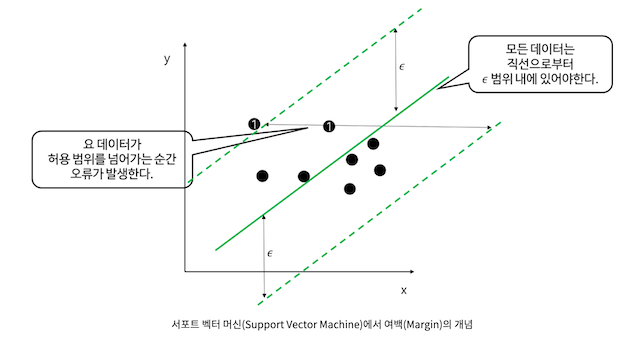

### b. 서포트 벡터 머신(Support Vector Machine)은 여백(Margin)을 최대화하는 초평 면을 찾는다.


서포트 벡터 머신(Support Vector Machine)은 여백(Margin)을 최대화하는 초평면을 찾는다. 즉, 여러 초평면이 있다면 여백(Margin)을 최대화하는 것이 좋다는 의미이다. 이것이 왜 좋은지 알아보자.

- 분류 문제

먼저 아래 그림에서 두 클래스를 분류하는 두개의 초록색 실선이 있다고 해보자. 

두 개의 직선은 모두 파란색과 빨간색을 완벽하게 분류한다. 하지만 왼쪽 여백(검은선)이 오른쪽보다 더 크다. 앞에서 여백 (Margin)이 주어진 데이터가 오류를 발생시키지 않고 움직일 수 있는 최대 공간이라고 했다. 

그렇다면 여백이 크다는 의미는 (주어진 데이터가 아닌) 새로운 데이터가 들어왔을 때 오류를 발생시키지 않도록 확보된 공간이라는 뜻이다. 이러한 관점에서 여백이 크면 클 수록 새로운 데이터가 오류를 발생시키지 않을 가능성이 크다는 것이다. 다시 말해 여백이 크다는 것이 일반화 관점에서 좋은 것이다.

서포트 벡터 머신은 학습 데이터에 대해서 완벽하게 분리한다면 이왕이면 여백이 큰 평면을 찾는 것이다.

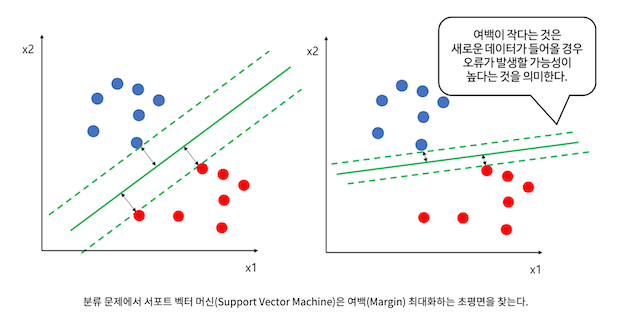

- 회귀 문제

회귀 문제도 분류 문제에서 설명했던 것과 같다. 

아래 두 직선은 모두 $ϵ$ 범위 내에 데이터를 포함하고 있 다. 이때 여백(빨간 선)을 보면 왼쪽이 오른쪽보다 더 크다. 분류 문제에서와 마찬가지로 서포트 벡터 머 신(Support Vector Machine)은 일반화 관점에서 여백이 큰 왼쪽 직선을 선호하게 된다.

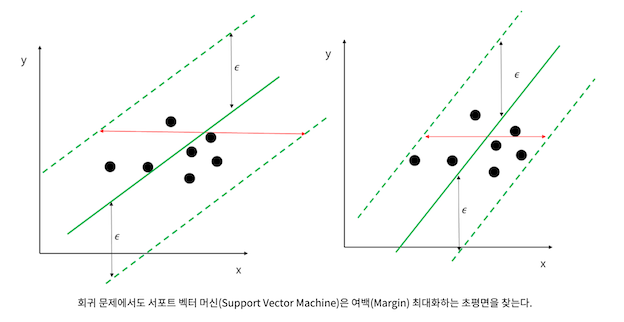

### c.서포트 벡터 머신(Support Vector Machine)은 지도 학습 알고리즘이다.

서포트 벡터 머신(Support Vector Machine)은 라벨 또는 종속 변수가 있는 데이터를 학습한뒤 라벨(도는 종속변수)를 예측하게 되는 지도 학습 알고리즘이다

###d. Remind

이제 서포트 벡터 머신(Support Vector Machine)의 정의를 더 잘 이해할수 있을것이다.

서포트 벡터 머신은 여백(margin)을 최대화 하는 초평면(Hyperplane)을 찾는 지도 학습 알고리즘이다

##2.서포트 벡터 머신(Support Vector Machine) 종류

https://zephyrus1111.tistory.com/211

## 3.서포트 벡터 머신(SUpport Vector Machine)장단점

### 장점




* a.회귀와 분류 문제에 모두 적용할 수 있다.
  * 로지스틱 회귀는 분류만 적용이 가능하나 서포트 벡터 머신은 분류뿐 아니라 회귀에도 적용 가능하다.

* b. 예측력이 좋다.
  * 로지스틱 회귀나 판별 분석은 데이터가 주어졌을 때 출력 라벨의 대한 조건부 확률을 예측한다. 따라서 실제 라벨링을 할 때에는 조건부확률을 예측하고 임계값을 정해야 한다(2번의 추정이 필요한 것이다).
하지만 서포트 벡터 머신은 확률이 아닌 라벨을 직접 추정하기 때문에 로지스틱 회귀나 판별 분석보다 는 예측력이 높다.

    * 즉 로지스틱 회귀나 판별 분석은 조건부 확률을 예측하지만 서포트 벡터 머신은 라벨을 직접 추정하기 때문에 두 모델에 비해 예측력이 높다


* c. 입력 변수와 출력 변수 간의 복잡한 관계를 모델링할 수 있다.
  * 변환 $\phi$ 나 커널 k를 이용하면 입력 변수와 출력 변수간 복잡한 관계를 모형화할 수 있다.

* d. 계산량의 이점과 입력 변수 차원의 덜 영향을 받는다.
  * 데이터가 많아도 결국엔 서포트 벡터만 이용해도 모수를 완벽하게 추정할 수 있어서 계산량의 이점이 있다. 또한 커널을 이용하면 $\phi$의 차원이 높더라도 예측값을 쉽게 계산할 수 있다.


### 단점

* a. 확률을 추정하지 못한다.
  * 서포트 벡터 머신은 분류 문제에서 일반적으로 확률을 추정하지 못한다. 따라서 확률 추정값을 요구하 는 분야에서는 큰 힘을 발휘하지 못한다. 이러한 단점을 극복하고자 분류 문제에서 Wu가 2004년 "Pro bability estimates for multi-class classification by pairwise coupling"이라는 논문에서 확률 을 추정하는 방법을 제안하기도 했다.

* b. 해석이 어렵다.
  * 커널이나 변환 𝜙 를 사용하는 경우 입력 변수와 출력 변수간의 해석이 어려워진다

## 4.Scikit - Learn을 이용한 서포트 벡터 머신 적용

### 분류

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn.svm import SVC

iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['species'] = [iris.target_names[x] for x in iris.target]
 
species_to_labels = dict(zip(df['species'].unique(), range(len(df['species'].unique()))))
df['species'] = df['species'].map(species_to_labels)
df = df.rename(columns={'species':'label'})
 
X = df.drop('label', axis=1).values
y = df['label'].values
 
for kernel in ['linear', 'poly', 'rbf', 'sigmoid']:
    clf = SVC(C=10, kernel=kernel)
    clf.fit(X, y)
    pred = clf.predict(X)
    print('커널 :', kernel, '정확도 :', np.mean(y == pred))

커널 : linear 정확도 : 0.98
커널 : poly 정확도 : 0.98
커널 : rbf 정확도 : 0.9866666666666667
커널 : sigmoid 정확도 : 0.04


### 회귀

커널 : linear MSE : 41.519494364611504


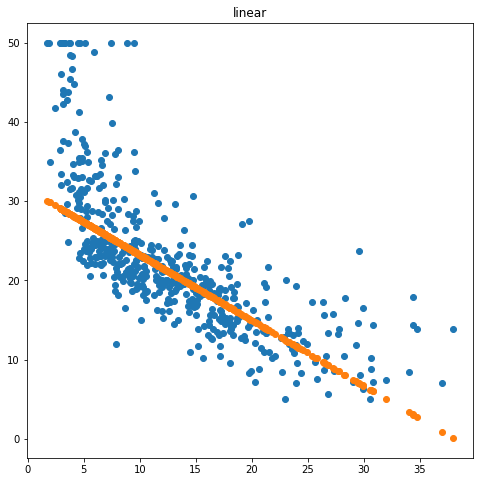

커널 : poly MSE : 56.31689507067191


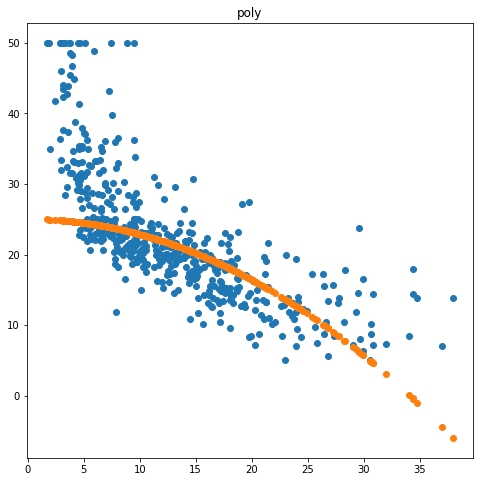

커널 : rbf MSE : 28.329063475165825


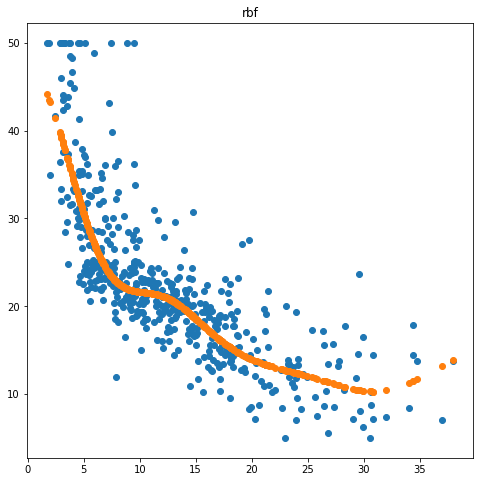

In [4]:
from sklearn.datasets import load_boston
from sklearn.svm import SVR
import warnings
warnings.filterwarnings("ignore")
 
boston = load_boston()
df = pd.DataFrame(boston.data, columns=boston.feature_names)
df['y'] = boston.target
X = df[['LSTAT']].values
y = df['y'].values
 
for kernel in ['linear', 'poly', 'rbf']:
    if kernel == 'poly':
        reg = SVR(kernel=kernel, C=10, degree=2)
    else:
        reg = SVR(kernel=kernel, C=10)
    reg.fit(X, y)
    pred = reg.predict(X)
    mse = np.mean(np.square(y-pred))
    print('커널 :', kernel, 'MSE :', mse)
    #시각화
    fig = plt.figure(figsize=(8,8))
    fig.set_facecolor('white')
    plt.scatter(X.flatten(), y)
    plt.scatter(X.flatten(), pred)
    plt.title(kernel)
    plt.show()